In [1]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['A','D', 'E'],
         'C': ['A', 'F', 'G'],
         'D': ['B'],
         'E': ['A', 'B','D'],
         'F': ['C'],
         'G': ['C']}




# visits all the nodes of a graph (connected component) using BFS
def bfs_connected_component(graph, start):
    # keep track of all visited nodes
    explored = []
    # keep track of nodes to be checked
    queue = [start]

    levels = {}         # this dict keeps track of levels
    levels[start]= 0    # depth of start node is 0

    visited= [start]     # to avoid inserting the same node twice into the queue

    # keep looping until there are nodes still to be checked
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        neighbours = graph[node]

        # add neighbours of node to queue
        for neighbour in neighbours:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)

                levels[neighbour]= levels[node]+1
                # print(neighbour, ">>", levels[neighbour])

    print(levels)

    return explored

ans = bfs_connected_component(graph,'D') # returns ['A', 'B', 'C', 'E', 'D', 'F', 'G']
print(ans)

{'D': 0, 'B': 1, 'A': 2, 'E': 2, 'C': 3, 'F': 4, 'G': 4}
['D', 'B', 'A', 'E', 'C', 'F', 'G']


In [2]:
import math

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Oval
from bokeh.palettes import Spectral8

N = 8
node_indices = list(range(N))

plot = figure(title='Graph Layout Demonstration', x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools='', toolbar_location=None)

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.add(Spectral8, 'color')
graph.node_renderer.glyph = Oval(height=0.1, width=0.2, fill_color='color')

graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

### start of layout code
circ = [i*2*math.pi/8 for i in node_indices]
x = [math.cos(i) for i in circ]
y = [math.sin(i) for i in circ]

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

plot.renderers.append(graph)

output_file('graph.html')
show(plot)

['B', 'C', 'E']
['B', 'C', 'E']
['B', 'C', 'E']
['A', 'D', 'E']
['A', 'D', 'E']
['A', 'D', 'E']
['A', 'F', 'G']
['A', 'F', 'G']
['A', 'F', 'G']
['B']
['A', 'B', 'D']
['A', 'B', 'D']
['A', 'B', 'D']
['C']
['C']


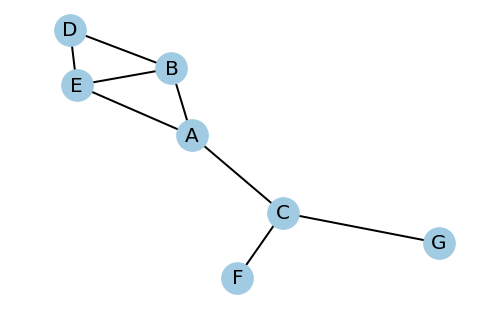

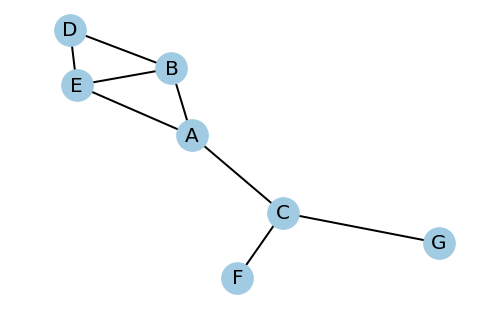

neighbour
A


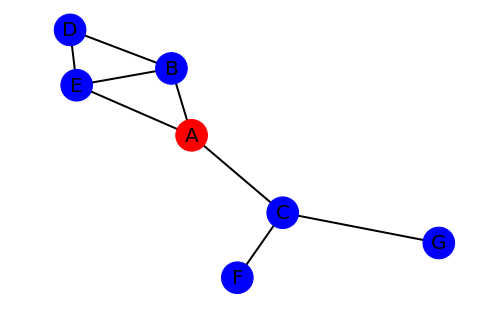

neighbour
F


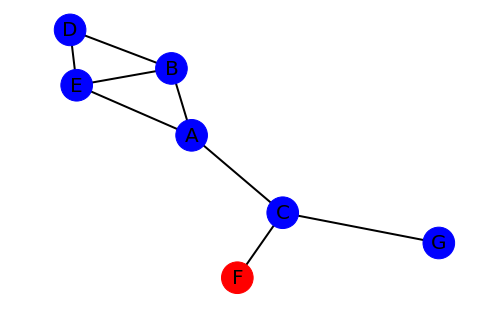

neighbour
G


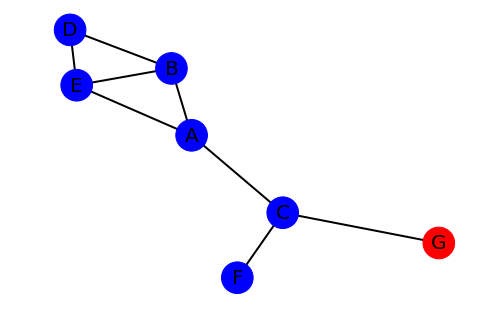

neighbour
B


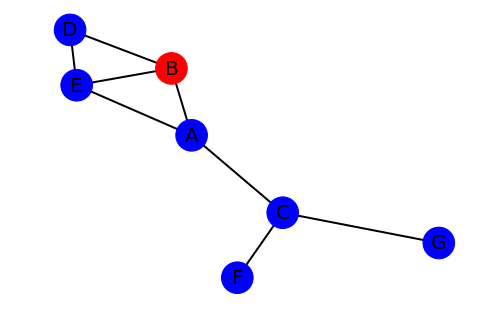

neighbour
E


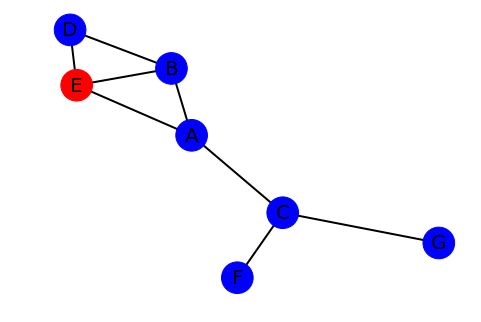

neighbour
D


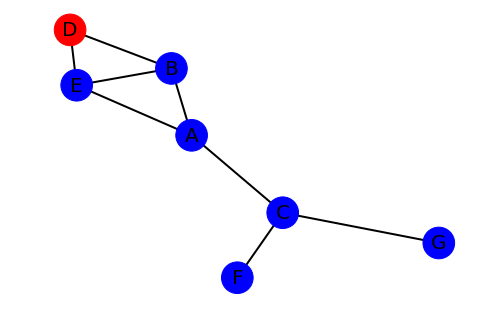

{'C': 0, 'A': 1, 'F': 1, 'G': 1, 'B': 2, 'E': 2, 'D': 3}
['C', 'A', 'F', 'G', 'B', 'E', 'D']


In [6]:
#!/usr/bin/python
import time
import sys
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph();



graph = {'A': ['B', 'C', 'E'],
         'B': ['A','D', 'E'],
         'C': ['A', 'F', 'G'],
         'D': ['B'],
         'E': ['A', 'B','D'],
         'F': ['C'],
         'G': ['C']}
"""

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
"""
#added

for node in graph:
    G.add_node(str(node))
for node in graph:
    for edging_nodes in graph[node]:
        G.add_edge(str(node),str(edging_nodes), weight = 1)
        print(graph[node])
        

#endAdd
"""

G.add_edge('A','B',weight=1)
G.add_edge('C','B',weight=4)
G.add_edge('B','D',weight=10)
"""
#first we should add all out graph into dict 

pos=nx.circular_layout(G)
pos=nx.spring_layout(G,dim=2,pos=pos)

colors=range(20)
nx.draw(G,font_size=20,width=2,node_size=1000,node_color='#A0CBE2',with_labels=True,pos = pos)

plt.savefig("test.png",dpi=300)
plt.show()


nx.draw(G, font_size=20, width=2,
               node_size=1000,
               with_labels=True, pos = pos,node_color='#A0CBE2')
               
plt.show()





#added bellow
def bfs_connected_component(graph, start):
    keys = list(graph)
    node_colors = ['blue','blue','blue','blue','blue','blue','blue']
    # keep track of all visited nodes
    explored = []
    # keep track of nodes to be checked
    queue = [start]

    levels = {}         # this dict keeps track of levels
    levels[start]= 0    # depth of start node is 0

    visited= [start]     # to avoid inserting the same node twice into the queue

    # keep looping until there are nodes still to be checked
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        neighbours = graph[node]

        # add neighbours of node to queue
        for neighbour in neighbours:
            if neighbour not in visited:
                print('neighbour')
                print(neighbour)
                time.sleep(1)
                ind = keys.index(str(neighbour))
                node_colors[ind] = 'red'
                nx.draw(G, font_size=20, width=2,node_color=node_colors,node_size=1000,with_labels=True, pos = pos)
                plt.show()
                time.sleep(3)
                queue.append(neighbour)
                visited.append(neighbour)

                levels[neighbour]= levels[node]+1
                node_colors[ind] = 'blue'
                
                # print(neighbour, ">>", levels[neighbour])

    print(levels)

    return explored

ans = bfs_connected_component(graph,'C') # returns ['A', 'B', 'C', 'E', 'D', 'F', 'G']
print(ans)

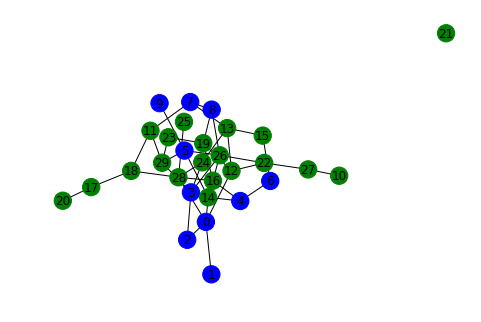

In [8]:
G = nx.erdos_renyi_graph(30,0.1)
color_map = []
for node in G:
    if node <10:
        color_map.append('blue')
    else: color_map.append('green')      
nx.draw(G,node_color = color_map,with_labels = True)
plt.show()

In [5]:
"""
from kivy.garden.matplotlib.backend_kivyagg import FigureCanvasKivyAgg
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
import matplotlib.pyplot as plt

plt.plot([1, 23, 2, 4])
plt.ylabel('some numbers')

class MyApp(App):

    def build(self):
        box = BoxLayout()
        box.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        return box

MyApp().run()



"""

[INFO   ] [Logger      ] Record log in C:\Users\Ivan\.kivy\logs\kivy_18-11-16_21.txt
[INFO   ] [Kivy        ] v1.10.1
[INFO   ] [Python      ] v3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.4.0 - Build 22.20.16.4708'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 630'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 4
[INFO   ] [GL          ] Shading version <b'4.40 - Build 22.20.16.4708'>
[INFO   ] [GL          ] Texture max size <16384>
[INFO   ] [G

Exception: Shader didnt link, check info log.

<Figure size 800x600 with 1 Axes>